In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from numpy.linalg import inv
from numpy import linalg as LA
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns

In [2]:
G = nx.karate_club_graph()
AA = nx.to_numpy_matrix(G)

In [3]:
A=np.zeros((G.number_of_nodes(), G.number_of_nodes()))
for i in range(0, G.number_of_nodes()):
    for j in range(0, G.number_of_nodes()):
        A[i][j]=AA[i,j]

def D_inverse():
    D=np.sum(A, axis=1)
    D=np.diag(D)
    D_inverse=inv(D)
    return D_inverse

# T is NOT the transition probability matrix
def T():
    T=np.dot(A, D_inverse())
    return T

In [4]:
def euler(x, beta=1, mu=1, D_S=1, D_I=1):
    h=0.01
    Y=[]
    Z=[]
    y=[]
    z=[]
    for i in range(0, G.number_of_nodes()):
        y.append(x[i])
        z.append(x[i+G.number_of_nodes()])
    for n in range(0, 1000):
        tempy = y
        tempz = z
        y = np.array(tempy) + (-beta*np.multiply(np.array(tempy), np.array(tempz)) + mu*np.array(tempz) - D_S*np.array(tempy) + D_S*np.dot(T(), np.array(tempy)))*h
        z = np.array(tempz) + (beta*np.multiply(np.array(tempy), np.array(tempz)) - mu*np.array(tempz) - D_I*np.array(tempz) + D_I*np.dot(T(), np.array(tempz)))*h
        y=y.tolist()
        z=z.tolist()
        Y.append(y)
        Z.append(z)
    return Z

In [5]:
# initial condition
S0=[]
I0=[]
for i in range(0, G.number_of_nodes()-1):
    S0.append(1)
    I0.append(0)
S0.append(0.99)
I0.append(0.01)
x0=S0+I0

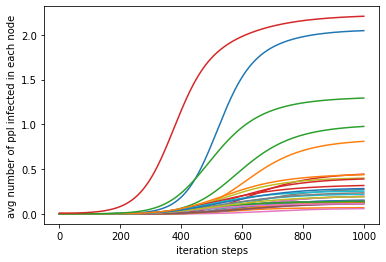

In [6]:
yy=euler(x0, beta=1, mu=1, D_S=1, D_I=1)
plt.plot(yy)
plt.xlabel('iteration steps')
plt.ylabel('avg number of ppl infected in each node')
plt.show()

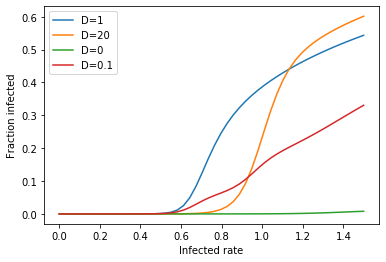

In [7]:
xx=np.linspace(0, 1.5, 50)
yy=[]
yy1=[]
yy2=[]
yy3=[]
yy4=[]
for i in range(0,len(xx)):
    Result=euler(x0, beta=xx[i], mu=1, D_S=1, D_I=1)
    yy1.append(sum(Result[-1])/G.number_of_nodes())
for i in range(0,len(xx)):
    Result=euler(x0, beta=xx[i], mu=1, D_S=20, D_I=20)
    yy2.append(sum(Result[-1])/G.number_of_nodes())
for i in range(0,len(xx)):
    Result=euler(x0, beta=xx[i], mu=1, D_S=0, D_I=0)
    yy3.append(sum(Result[-1])/G.number_of_nodes())
for i in range(0,len(xx)):
    Result=euler(x0, beta=xx[i], mu=1, D_S=0.1, D_I=0.1)
    yy4.append(sum(Result[-1])/G.number_of_nodes())

plt.plot(xx, yy1, label ='D=1')
plt.plot(xx, yy2, label ='D=20')
plt.plot(xx, yy3, label ='D=0')
plt.plot(xx, yy4, label ='D=0.1')
plt.xlabel('Infected rate')
plt.ylabel('Fraction infected')
plt.legend()
plt.show()